<a href="https://colab.research.google.com/github/OjasTamhankar/Machine-Learning-Lab/blob/main/Exxperiment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the mean and standard deviation of scaled data
print("Means after scaling:", np.mean(X_scaled, axis=0))
print("Standard deviations after scaling:", np.std(X_scaled, axis=0))

Means after scaling: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviations after scaling: [1. 1. 1. 1.]


In [4]:
pca_full = PCA()
pca_full.fit(X_scaled)

# Eigenvalues (variance per component)
print("Explained variance (eigenvalues):\n", pca_full.explained_variance_)

# Explained variance ratio (fraction of total variance)
print("\nExplained variance ratio:\n", pca_full.explained_variance_ratio_)

# Total variance retained (should be ~1)
print("\nTotal variance retained:", sum(pca_full.explained_variance_ratio_))

Explained variance (eigenvalues):
 [2.93808505 0.9201649  0.14774182 0.02085386]

Explained variance ratio:
 [0.72962445 0.22850762 0.03668922 0.00517871]

Total variance retained: 1.0000000000000002


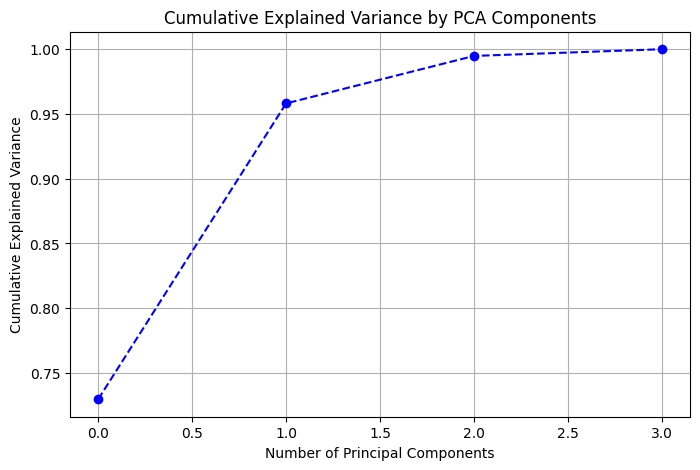

In [5]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [6]:
# ------------------------------------------------------------
# Step 6: Reduce to 2 principal components for visualization
# ------------------------------------------------------------
# Why: Easier to visualize 2D data and check how classes separate.

pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

# Combine with target for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

df_pca.head()


,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


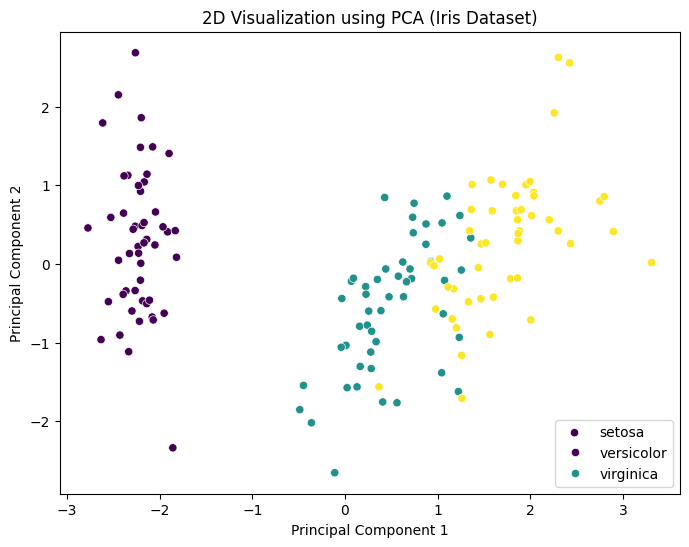

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='target', palette='viridis', data=df_pca)
plt.title("2D Visualization using PCA (Iris Dataset)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(labels=target_names)
plt.show()

Feature contributions to each principal component:

                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942


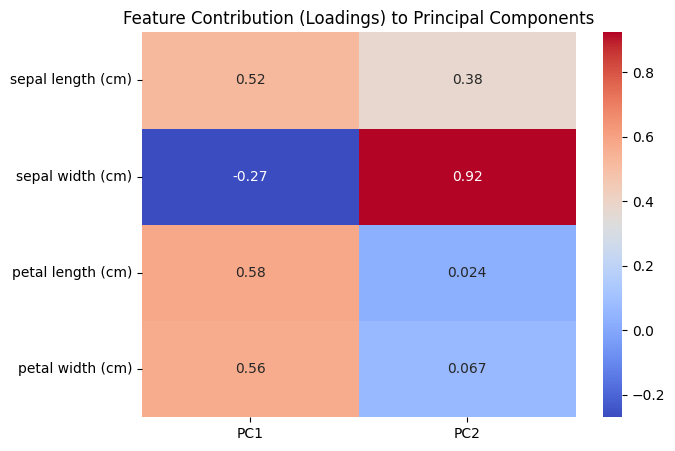

In [8]:
loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)

print("Feature contributions to each principal component:\n")
print(loadings)

# Visualize as heatmap
plt.figure(figsize=(7,5))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("Feature Contribution (Loadings) to Principal Components")
plt.show()

In [9]:
explained_var = pca_2d.explained_variance_ratio_
print("Explained Variance by Each Principal Component:")
print(f"PC1: {explained_var[0]*100:.2f}%")
print(f"PC2: {explained_var[1]*100:.2f}%")
print(f"Total Variance Retained: {sum(explained_var)*100:.2f}%")

Explained Variance by Each Principal Component:
PC1: 72.96%
PC2: 22.85%
Total Variance Retained: 95.81%
